In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graph-response/calculated_dataset.xlsx


## Loading Excel to Pandas

In [2]:
xlsx_file = "/kaggle/input/graph-response/calculated_dataset.xlsx"
xlsx_data = pd.read_excel(xlsx_file, sheet_name=None, header=0)
combined_df = xlsx_data['Combined']
m3_df = xlsx_data['M3']
oporajita_df = xlsx_data['Oporajita']
design_df = xlsx_data['Design']


## Average Sentiment Scores of participants

In [3]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def avg_sentiment_participant_dataframe(df):
    df_grouped = df.groupby('Participant').agg({
        'Group': 'first',
        'Description': lambda x: ' '.join(x),  # Concatenate descriptions
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()

    # Define a function to extract the numeric part from the participant string
    def extract_numeric_part(participant):
        numeric_part = re.findall(r'\d+', participant)
        if numeric_part:
            return int(numeric_part[0])
        else:
            return 0

    # Sort the participants based on the extracted numeric part
    sorted_participants = sorted(df_grouped['Participant'], key=extract_numeric_part)

    # Reorder the dataframe based on the sorted participants
    df_grouped['Participant'] = pd.Categorical(df_grouped['Participant'], categories=sorted_participants, ordered=True)
    df_grouped = df_grouped.sort_values('Participant')

    return df_grouped


avg_combined_df = avg_sentiment_participant_dataframe(combined_df)
avg_m3_df = avg_sentiment_participant_dataframe(m3_df)
avg_oporajita_df = avg_sentiment_participant_dataframe(oporajita_df)
avg_design_df = avg_sentiment_participant_dataframe(design_df)

avg_combined_df 
avg_m3_df 
avg_oporajita_df 
avg_design_df 


,Participant,Group,Description,Sentiment_Positive,Sentiment_Neutral,Sentiment_Negative
14,P3,NSU,Proper lighting arrangement and cctv cameras o...,0.223950,0.732550,0.043475
25,P4,NSU,Alleviate taboo related to buying sanitary nap...,0.315350,0.508900,0.175650
0,P11,NSU,Same salary structure for men and women. male ...,0.101825,0.813900,0.084275
1,P14,NSU,Equal Ratio at Workplace. No taboo related to ...,0.154913,0.771888,0.073212
2,P17,RUET,Police and cyber security officers can observe...,0.125140,0.770760,0.104080
3,P18,RUET,Mentoring and Gromming session in different sa...,0.149000,0.682125,0.168850
4,P19,RUET,Another application where parent can found how...,0.283240,0.625980,0.090780
5,P20,RUET,Application based bus service should be implem...,0.157200,0.735513,0.107300
6,P21,RUET,"Emphasize in making Drama, Movie, Cartoon to s...",0.249367,0.686400,0.064267
7,P22,RUET,Counseling session for parents about how child...,0.212167,0.678000,0.109833


## Graphing Sentiment Scores Per Participant

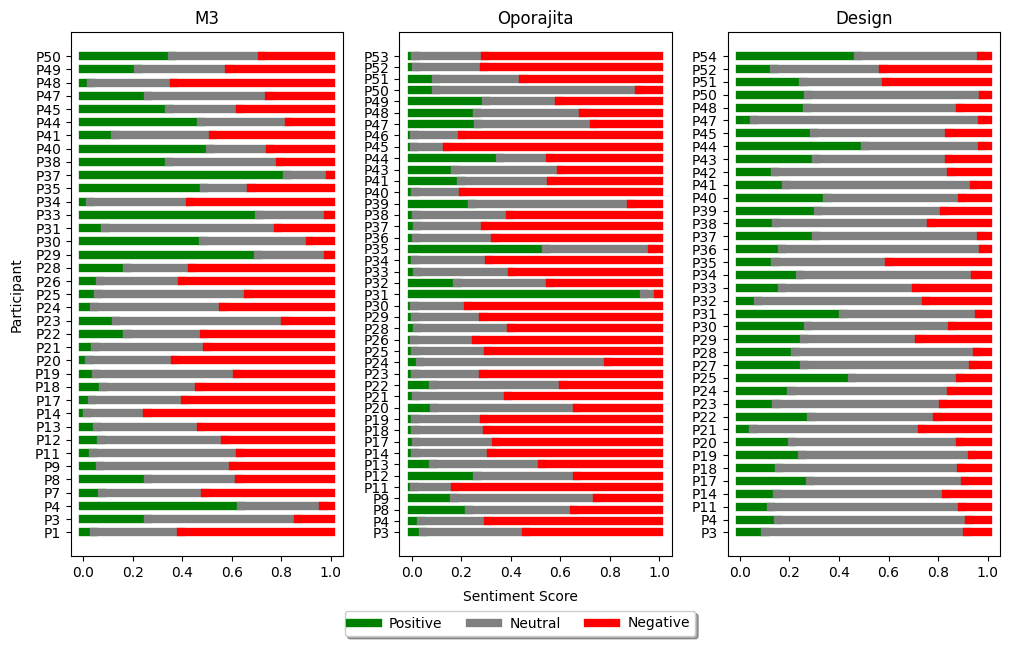

Sentiment Analysis for each Participant


In [4]:
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 1.5

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Participant']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='green', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='grey', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='red', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(df['Participant']) 

    
custom_tick_labels = ['Participant A', 'Participant B', 'Participant C']    
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_m3_df, 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_oporajita_df, 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_design_df, 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.01, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Participant', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), shadow=True, ncol=3)

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Participant')


## Average Sentiment Scores for Groups

In [5]:
def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped
avg_sentiment_group_dataframe(combined_df)
avg_sentiment_group_dataframe(oporajita_df)
avg_sentiment_group_dataframe(design_df)



,Group,Sentiment_Positive,Sentiment_Neutral,Sentiment_Negative
0,CUET,0.307911,0.522951,0.169123
1,NSU,0.180533,0.729357,0.090100
2,RUET,0.182885,0.678732,0.138377
3,SUST,0.256917,0.603528,0.139564


## Graphing Sentiment Scores Per Group

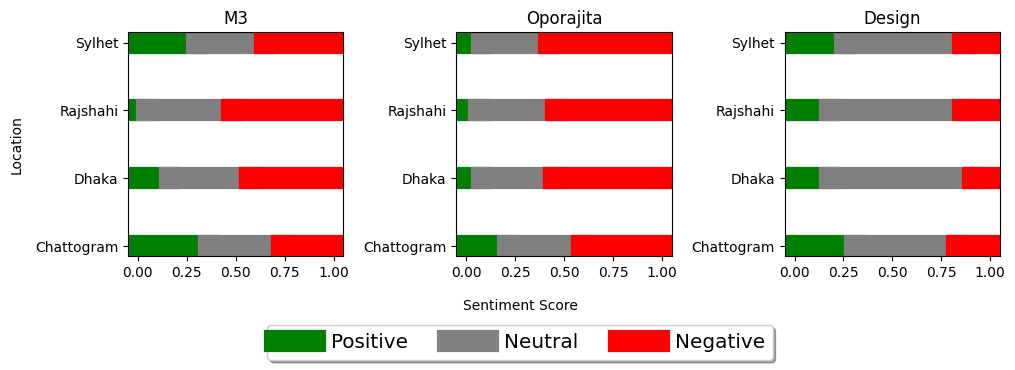

Sentiment Analysis for each Locations


In [6]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 4

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Group']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='green', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='grey', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='red', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(custom_tick_labels) 

custom_tick_labels = ['Chattogram','Dhaka','Rajshahi','Sylhet' ]
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(m3_df), 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(oporajita_df), 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(design_df), 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Location', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=3, fontsize='x-large')

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Locations')

sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']

def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped


35
[[ 2  2  4]
 [ 0  4  8]
 [ 0  4 11]]


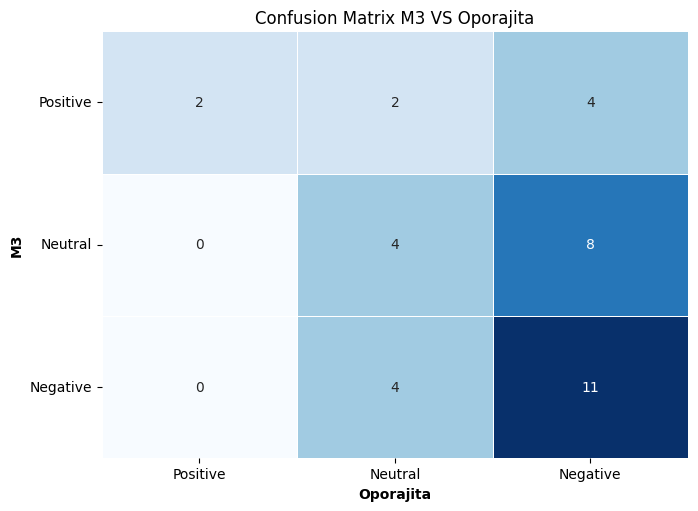

In [7]:
# Convert to DataFrames
df1 = avg_m3_df
df2 = avg_oporajita_df

# Merge DataFrames based on 'participant'
common_participants = pd.merge(df1, df2, on='Participant', how='inner')
print(len(common_participants))

# Get true and predicted labels
true_labels = common_participants[['Sentiment_Positive_x', 'Sentiment_Neutral_x', 'Sentiment_Negative_x']].values
predicted_labels = common_participants[['Sentiment_Positive_y', 'Sentiment_Neutral_y', 'Sentiment_Negative_y']].values

# Compute confusion matrix
cm = confusion_matrix(np.argmax(true_labels, axis=1), np.argmax(predicted_labels, axis=1))
print(cm)

classes = ['Positive', 'Neutral', 'Negative']
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)

plt.tight_layout()
plt.title('Confusion Matrix M3 VS Oporajita')
plt.ylabel('M3', fontweight='bold')
plt.xlabel('Oporajita', fontweight='bold')
plt.gca().set_xticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_yticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_xticklabels(classes, rotation=0)
plt.gca().set_yticklabels(classes, rotation=0)
plt.show()


## Summary Sentiment

In [8]:
def summary_sentiment(df):
    sentiments = ['Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
    summary_data = {}  # Initialize an empty dictionary to store summary data for all sentiments
    for sentiment in sentiments:
        # Calculate min, avg, max for current sentiment
        summary_data[sentiment] = df[sentiment].agg(['min', 'mean', 'max'])
    return summary_data

summary_m3 = summary_sentiment(avg_m3_df)
summary_oporajita = summary_sentiment(avg_oporajita_df)
summary_design = summary_sentiment(avg_design_df)

print(summary_m3)
print(summary_oporajita)
print(summary_design)

{'Sentiment_Positive': min     0.015500
mean    0.227718
max     0.823500
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.171300
mean    0.404164
max     0.696800
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.005100
mean    0.368109
max     0.744000
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.008500
mean    0.117502
max     0.939300
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.056000
mean    0.358391
max     0.819740
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.004800
mean    0.524101
max     0.858200
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.051767
mean    0.232048
max     0.504560
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.334717
mean    0.626896
max     0.918600
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.018950
mean    0.141053
max     0.422450
Name: Sent

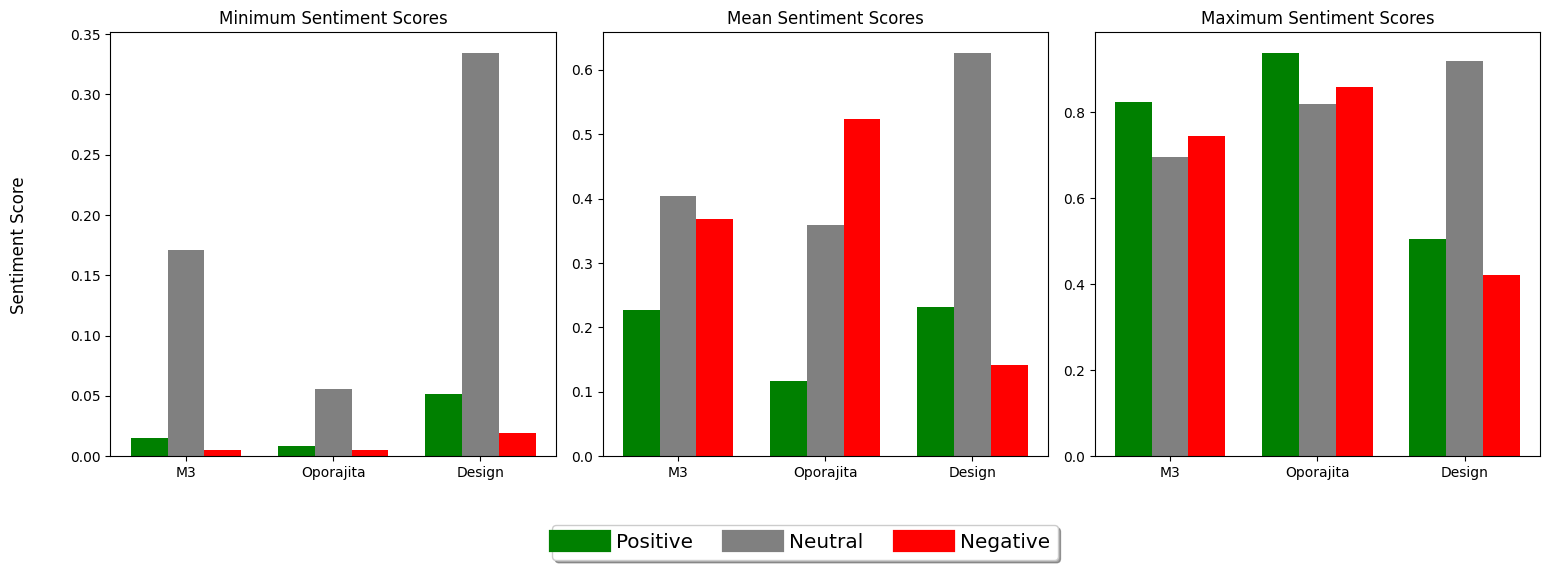

Min, Mean and Max Sentiment Scores


In [9]:
def plot_sentiment_scores(ax, data, title):
    labels = ['M3', 'Oporajita', 'Design']
    x = np.arange(len(labels))
    width = 0.25

    for i, (label, color) in enumerate(zip(['Positive', 'Neutral', 'Negative'], ['green', 'grey', 'red'])):
        ax.bar(x + i*width - width, data[label], width, label=label, color=color)

#     ax.set_xlabel('Dataset')
#     ax.set_ylabel('Sentiment Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

# Data
min_data = {
    'Positive': [summary_m3['Sentiment_Positive']['min'], 
                 summary_oporajita['Sentiment_Positive']['min'], 
                 summary_design['Sentiment_Positive']['min']],
    'Neutral': [summary_m3['Sentiment_Neutral']['min'], 
                summary_oporajita['Sentiment_Neutral']['min'], 
                summary_design['Sentiment_Neutral']['min']],
    'Negative': [summary_m3['Sentiment_Negative']['min'], 
                 summary_oporajita['Sentiment_Negative']['min'], 
                 summary_design['Sentiment_Negative']['min']]
}

mean_data = {
    'Positive': [summary_m3['Sentiment_Positive']['mean'], 
                 summary_oporajita['Sentiment_Positive']['mean'], 
                 summary_design['Sentiment_Positive']['mean']],
    'Neutral': [summary_m3['Sentiment_Neutral']['mean'], 
                summary_oporajita['Sentiment_Neutral']['mean'], 
                summary_design['Sentiment_Neutral']['mean']],
    'Negative': [summary_m3['Sentiment_Negative']['mean'], 
                 summary_oporajita['Sentiment_Negative']['mean'], 
                 summary_design['Sentiment_Negative']['mean']]
}

max_data = {
    'Positive': [summary_m3['Sentiment_Positive']['max'], 
                 summary_oporajita['Sentiment_Positive']['max'], 
                 summary_design['Sentiment_Positive']['max']],
    'Neutral': [summary_m3['Sentiment_Neutral']['max'], 
                summary_oporajita['Sentiment_Neutral']['max'], 
                summary_design['Sentiment_Neutral']['max']],
    'Negative': [summary_m3['Sentiment_Negative']['max'], 
                 summary_oporajita['Sentiment_Negative']['max'], 
                 summary_design['Sentiment_Negative']['max']]
}

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='x-large')

# Set common xlabel and ylabel for the entire figure
#fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.03, 0.5, 'Sentiment Score', va='center', rotation='vertical', fontsize='large')
# Plotting minimum sentiment scores
plot_sentiment_scores(axs[0], min_data, 'Minimum Sentiment Scores')

# Plotting mean sentiment scores
plot_sentiment_scores(axs[1], mean_data, 'Mean Sentiment Scores')

# Plotting maximum sentiment scores
plot_sentiment_scores(axs[2], max_data, 'Maximum Sentiment Scores')

plt.tight_layout()
plt.show()
print('Min, Mean and Max Sentiment Scores')